In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier

In [2]:
def add_metadata(metadata, features):
    names = [x.split("-") for x in features['sound.files']]
    ids = [int(x[2].replace(".wav",'')) for x in names]
    ordered_metadata = pd.DataFrame()
    for i in ids:
        df = metadata[metadata.Recording_ID == i]
        ordered_metadata = ordered_metadata.append(df,ignore_index=True)
    X = ordered_metadata.join(features)
    good_rows = features.iloc[:,1:].apply(lambda x : not np.any(np.isnan(x)), axis = 1)
    mystery_rows = [x[0] == "Mystery" or x[0] == "Sonus" for x in names]
    return X[[a and not b for a,b in zip(good_rows,mystery_rows)]]

In [ ]:
features = pd.read_csv('Data/feature_vectors.csv',header = None, 
                       names=["sound.files","selec","duration","meanfreq","sd","freq.median","freq.Q25",
                              "freq.Q75","freq.IQR","time.median","time.Q25","time.Q75","time.IQR",
                              "skew","kurt","sp.ent","time.ent","entropy","sfm",
                              "meandom","mindom","maxdom","dfrange","modindx","startdom",
                              "enddom","dfslope","meanpeakf"])
metadata = pd.read_csv('Data/metadata.csv', encoding = "ISO-8859-1")

In [6]:
good_boi = add_metadata(metadata,features)

In [8]:
#Declare features and targets for all species
species = good_boi.English_name
y = species.astype("category").cat.codes
X = good_boi.iloc[:,18:]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

#Normalize for all species
nX = pd.DataFrame.from_records(preprocessing.normalize(X, axis = 0))
nX_train, nX_test, ny_train, ny_test = train_test_split(nX, y, random_state=1)

#Filter out species with small data counts
counts = good_boi.groupby('English_name').count()
#good_names = counts[counts.Recording_ID >= 100].index
good_names = counts.sort_values(by='Recording_ID', ascending = False).iloc[:10,:].index
filtered_boi = good_boi[[x.English_name in good_names for i,x in good_boi.iterrows()]]

#Declare features and targets for filtered species
fspecies = filtered_boi.English_name
fy = fspecies.astype("category").cat.codes
fX = filtered_boi.iloc[:,18:]
fX_train, fX_test, fy_train, fy_test = train_test_split(fX, fy, random_state=14)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

#Normalize for filtered species
nfX = pd.DataFrame.from_records(preprocessing.normalize(fX, axis = 0))
nfX_train, nfX_test, nfy_train, nfy_test = train_test_split(nfX, fy, random_state=1)

In [12]:
#Bad model: Logistic Regression

#Iterate over random_state to check scores
for i in range(2):
    nfX_train, nfX_test, nfy_train, nfy_test = train_test_split(nfX, fy, random_state=i)
    model = LogisticRegression(solver='lbfgs', multi_class = 'auto', max_iter=20000)
    model.fit(nfX_train,nfy_train);
    print(model.score(nfX_test,nfy_test))

0.04929208180388044
0.04745673833245936


KeyboardInterrupt: 

In [20]:
#SVC
for i in range(3):
    fnX_train, fnX_test, fny_train, fny_test = train_test_split(fnX, fy, random_state=i)
    model = SVC(kernel="linear",gamma=1,C=4)
    model.fit(fnX_train, fny_train)
    print(model.score(fnX_test, fny_test))

0.04929208180388044
0.04745673833245936
0.04876769795490299


KeyboardInterrupt: 

In [12]:
#Gradient Boosting Classifier
#Way too slow to compute 5 times for new data set; instead I interrupted after it got one

for i in range(1):
    nfX_train, nfX_test, nfy_train, nfy_test = train_test_split(nfX, fy, random_state=i)
    model = GradientBoostingClassifier(max_features = 5)
    model.fit(nfX_train,nfy_train);
    print(model.score(nfX_test,nfy_test))

0.4939695857367593


KeyboardInterrupt: 

In [28]:
#LDA
for i in range(5):
    nfX_train, nfX_test, nfy_train, nfy_test = train_test_split(nfX, fy, random_state=i)
    model = LinearDiscriminantAnalysis()
    model.fit(nfX_train,nfy_train);
    print(model.score(nfX_test, nfy_test))

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.2422653382275826
0.26428945988463554


C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.2548505506030414
0.24095437860513896
0.2464604090194022


C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [17]:
#KNeighbors
for i in range(5):
    nfX_train, nfX_test, nfy_train, nfy_test = train_test_split(nfX, fy, random_state=i)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(nfX_train, nfy_train)
    print(knn.score(nfX_test, nfy_test))

0.43471421080230727
0.41924488725747244
0.4208180388044048
0.4318300996329313
0.4297325642370215
0.42815941269008917
0.424488725747247
0.4268484530676455
0.4268484530676455
0.43445201887781854
0.42789722076560044
0.43733613004719457
0.42632406921866806
0.42501310959622446


In [22]:
#Decision Trees
for i in range(5):
    nfX_train, nfX_test, nfy_train, nfy_test = train_test_split(nfX, fy, random_state=i)
    model = DecisionTreeClassifier(min_samples_split=2)
    model.fit(nfX_train, nfy_train)
    print(model.score(nfX_test, nfy_test))

0.43707393812270584
0.44782380702674357
0.437860513896172
0.45280545359202934
0.4457262716308338


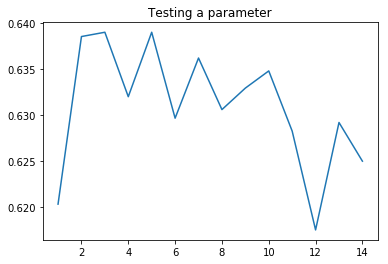

In [264]:
#An example of parameter testing: checking for best max_features value in RandomForestClassifier
#We see 5 is good (and this is about sqrt(n_features), which is recommended for classification)
scores = []
for j in range(1,15):
    model = RandomForestClassifier(max_features = j, max_depth=None, min_samples_split = 2,
                                   n_estimators = 100, random_state = 0)
    model.fit(nfX_train,nfy_train);
    scores = scores + [model.score(nfX_test,nfy_test)]
plt.plot(range(1,15),scores)
plt.title('Testing max_features')
plt.show()

In [9]:
#So we choose 5 as a good value for max_features
for i in range(5):
    nfX_train, nfX_test, nfy_train, nfy_test = train_test_split(nfX, fy, random_state=i)
    model = RandomForestClassifier(max_features = 5, max_depth=None, min_samples_split = 2, n_estimators = 100, random_state = 0)
    model.fit(nfX_train,nfy_train);
    print(model.score(nfX_test,nfy_test))

0.6486628211851075
0.6599370739381227
0.6470896696381752
0.6489250131095963
0.6646565285789198


In [10]:
#BEST MODEL: Extremely random trees

#Still use 5 for max_features but n_estimators should increase to account for extra randomness
#(increasing n_estimators beyond 100 in RandomForestClassifier made very little difference; here it makes a difference)
for i in range(5):
    nfX_train, nfX_test, nfy_train, nfy_test = train_test_split(nfX, fy, random_state=i)
    model = ExtraTreesClassifier(max_features = 5, max_depth=None, min_samples_split = 2, n_estimators = 1000, random_state = 0)
    model.fit(nfX_train,nfy_train);
    print(model.score(nfX_test,nfy_test))

0.7042475091767174
0.7115888830624016
0.6976927110644993
0.6992658626114315
0.70372312532774


In [27]:
#AdaBoost with RandomForestClassifier
for i in range(4):
    nfX_train, nfX_test, nfy_train, nfy_test = train_test_split(nfX, fy, random_state=i)
    modelada = RandomForestClassifier(max_depth=None, min_samples_split = 2, n_estimators=100, max_features=5)
    model = AdaBoostClassifier(base_estimator=modelada,n_estimators=100, random_state=0)
    model.fit(nfX_train,nfy_train)
    print(model.score(nfX_test,nfy_test))

0.6536444677503933
0.6691137912952281
0.6407970634504457
0.6512847404299947


KeyboardInterrupt: 

In [29]:
#AdaBoostClassifier with Extremely Random Trees
for i in range(4):
    nfX_train, nfX_test, nfy_train, nfy_test = train_test_split(nfX, fy, random_state=i)
    modelada = ExtraTreesClassifier(max_features = 5, max_depth=None, min_samples_split = 2, n_estimators = 1000, random_state = 0)
    model = AdaBoostClassifier(base_estimator=modelada,n_estimators=100, random_state=0)
    model.fit(nfX_train,nfy_train)
    print(model.score(nfX_test,nfy_test))

KeyboardInterrupt: 

## Plots

In [13]:
#2d PCA plotting (not very good)
def _2d_plot_pca(species, X, title): #len(species) = nrows(X)
    pca = PCA(n_components=2)
    pca.fit(X);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    for i in everything.groupby('species').__iter__():
        tuples = pca.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        plt.scatter(xs, ys);
    plt.title(title)
    plt.show()

In [14]:
#3d PCA plotting (not very good)
def _3d_plot_pca(species, X, title): #len(species) = nrows(X)
    pca = PCA(n_components=3)
    pca.fit(X);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d', title = title)
    for i in everything.groupby('species').__iter__():
        tuples = pca.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        zs = tuples[:,2]
        ax.scatter(xs, ys, zs);
    plt.show()

In [19]:
#2d LDA plotting
def _2d_plot_lda(species, X, y, title): #len(species) = nrows(X)
    lda = LinearDiscriminantAnalysis(n_components = 2)
    lda.fit(X,y);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    for i in everything.groupby('species').__iter__():
        tuples = lda.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        plt.scatter(xs, ys);
    plt.title(title)
    plt.show()

In [10]:
#3d LDA plotting
def _3d_plot_lda(species, X, y, title): #len(species) = nrows(X)
    lda = LinearDiscriminantAnalysis(n_components=3)
    lda.fit(X,y);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d',title=title)
    for i in everything.groupby('species').__iter__():
        tuples = lda.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        zs = tuples[:,2]
        ax.scatter(xs, ys, zs);
    plt.show()

In [18]:
_2d_plot_lda(fspecies,fX,fy,'LDA')

NameError: name '_2d_plot_lda' is not defined

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


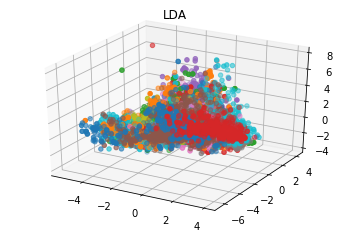

In [17]:
_3d_plot_lda(fspecies,fX,fy,'LDA')